# TP tutoré : pima(diabète)

* https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
* https://www.datacamp.com/community/tutorials/decision-tree-classification-python

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
# load dataset
#pima = pd.read_csv("./diabetes.csv" header=None, names=col_names)
pima = pd.read_csv(r"C:\Users\bejao\OneDrive\data\diabetes.csv")
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
#split dataset in features and target variable
# X = pima.drop('Outcome', 1) # Features
# y = pima['Outcome'] # Target variable
# X
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y) # 70% training and 30% test

In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [12]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7395833333333334


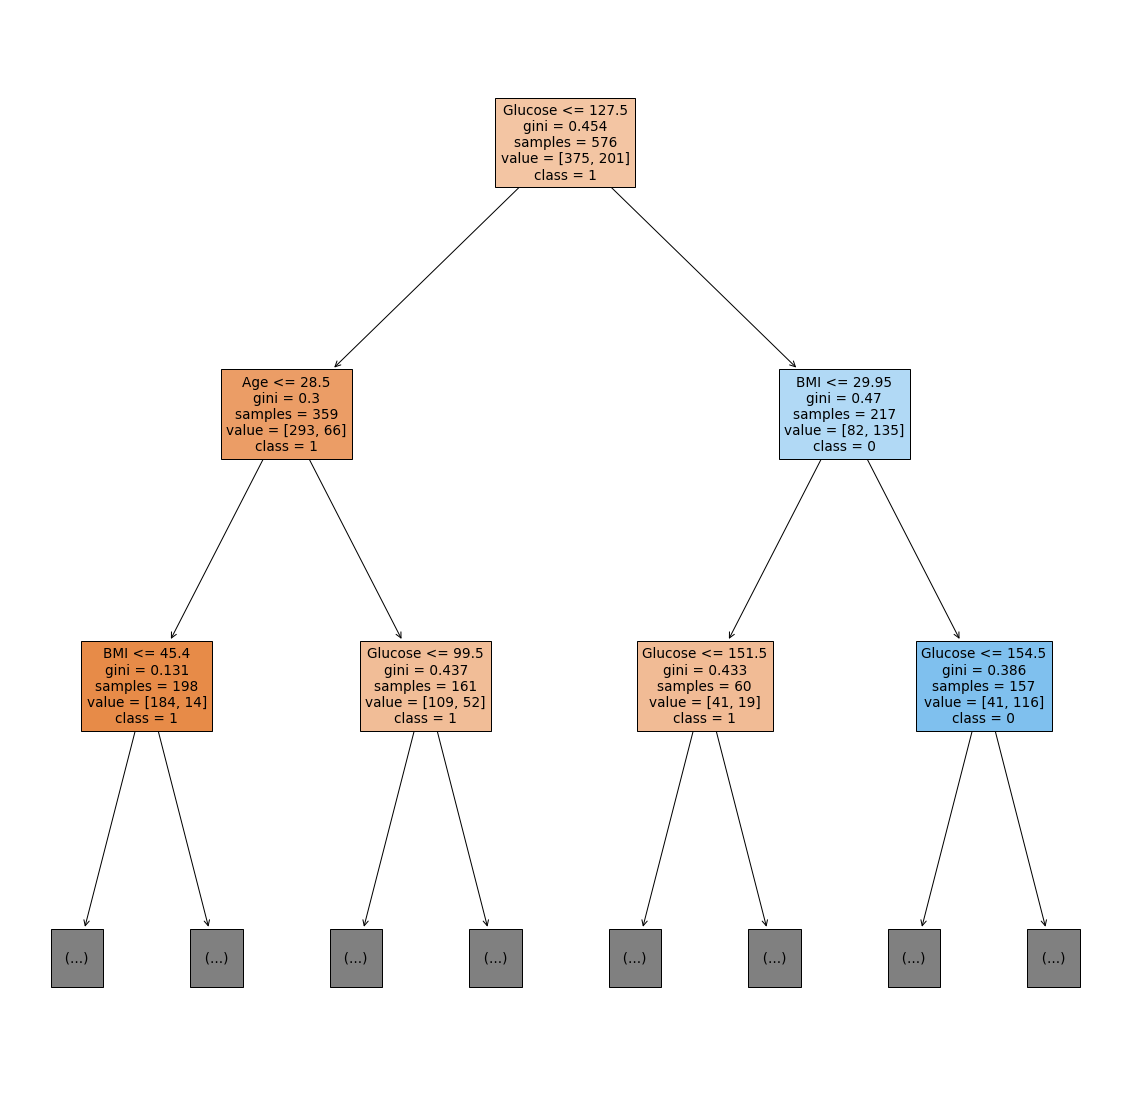

In [17]:
from sklearn import tree
plt.figure(figsize = (20, 20))
tree_plot=tree.plot_tree(clf, feature_names=X. columns, max_depth=2, filled=True, class_names=y.unique().astype(str))

In [22]:
# Pruner l'arbre  (optimiser l'IA)
scores=[]
for max_depth in range(2, 10) : 
    clf=DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    score=clf.score(X_test, y_test)
    scores.append(score)
scores

[0.7447916666666666,
 0.7604166666666666,
 0.7552083333333334,
 0.7604166666666666,
 0.7447916666666666,
 0.7291666666666666,
 0.734375,
 0.7395833333333334]

In [24]:
# Je retiens un decision tree avec comme max_depth = 3
clf=DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
clf. predict(X_test) 
score=clf.score(X_test, y_test)
score

0.7604166666666666

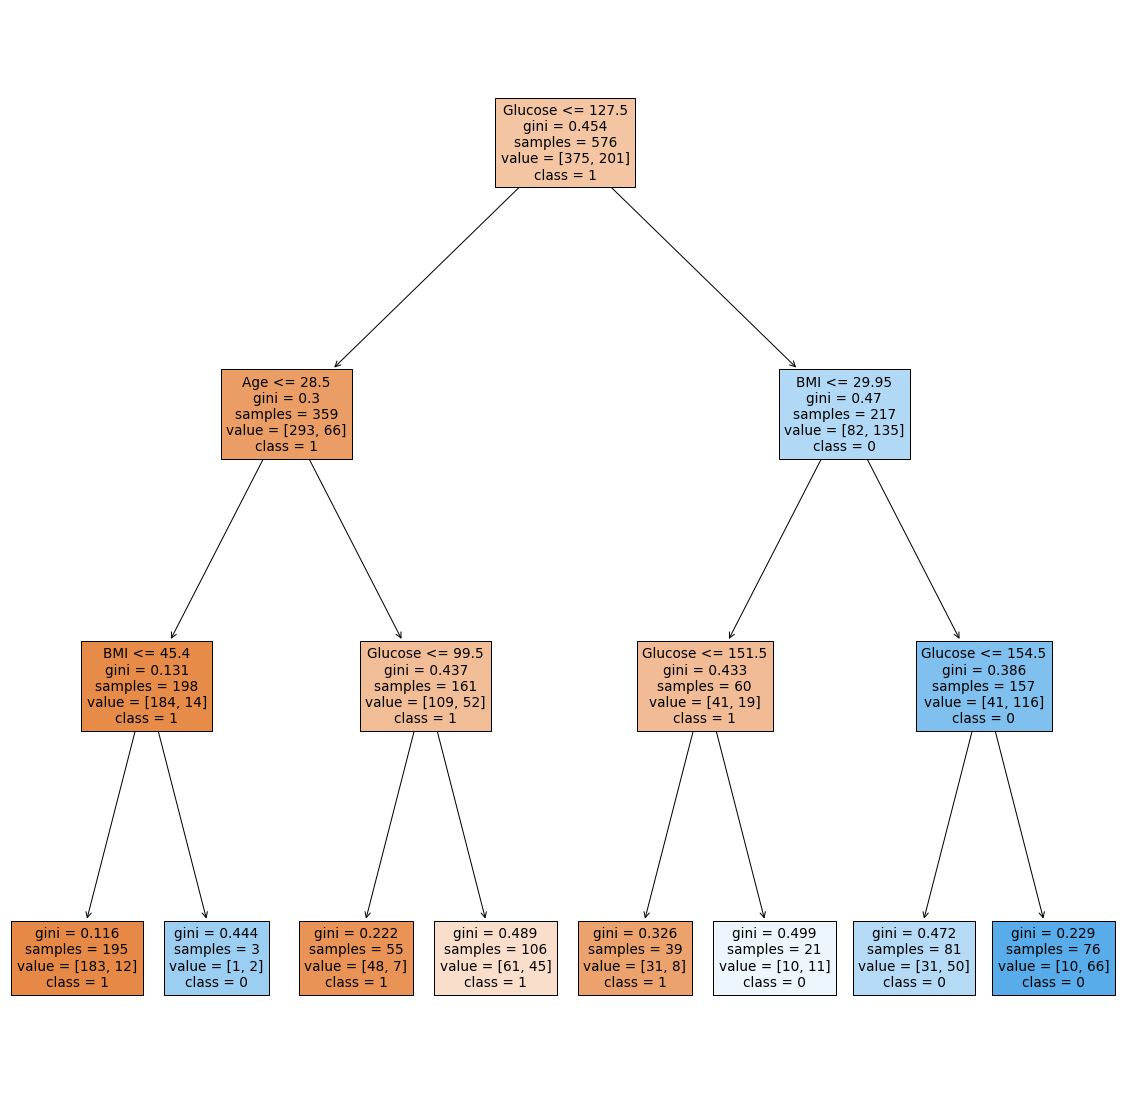

In [26]:
plt.figure(figsize = (20, 20))
tree_plot=tree.plot_tree(clf, feature_names=X. columns, filled=True, class_names=y.unique().astype(str))

In [21]:
print(tree.export_text(clf, feature_names=X_train.columns.values.tolist())) 

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 45.40
|   |   |   |--- Pregnancies <= 7.50
|   |   |   |   |--- BMI <= 32.30
|   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.69
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- DiabetesPedigreeFunction >  0.69
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- BMI >  32.30
|   |   |   |   |   |--- BloodPressure <= 22.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- BloodPressure >  22.00
|   |   |   |   |   |   |--- DiabetesPedigreeFunction <= 1.27
|   |   |   |   |   |   |   |--- BMI <= 38.30
|   |   |   |   |   |   |   |   |--- BMI <= 37.30
|   |   |   |   |   |   |   |   |   |--- Glucose <= 106.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Glucose >  106.0

In [27]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

In [28]:
def find_path(node_numb, path, x):
        path.append(node_numb)
        if node_numb == x:
            return True
        left = False
        right = False
        if (children_left[node_numb] !=-1):
            left = find_path(children_left[node_numb], path, x)
        if (children_right[node_numb] !=-1):
            right = find_path(children_right[node_numb], path, x)
        if left or right :
            return True
        path.remove(node_numb)
        return False


def get_rule(path, column_names):
    mask = ''
    for index, node in enumerate(path):
        #We check if we are not in the leaf
        if index!=len(path)-1:
            # Do we go under or over the threshold ?
            if (children_left[node] == path[index+1]):
                mask += "(pima['{}']<= {}) \t ".format(column_names[feature[node]], threshold[node])
            else:
                mask += "(pima['{}']> {}) \t ".format(column_names[feature[node]], threshold[node])
    # We insert the & at the right places
    mask = mask.replace("\t", "&", mask.count("\t") - 1)
    mask = mask.replace("\t", "")
    return mask

In [31]:
# Leaves
leave_id = clf.apply(X_test)

paths ={}
for leaf in np.unique(leave_id):
    path_leaf = []
    find_path(0, path_leaf, leaf)
    paths[leaf] = np.unique(np.sort(path_leaf))

rules = {}
for key in paths:
    rules[key] = get_rule(paths[key], pima.columns)
    


In [32]:
rules

{3: "(pima['Glucose']<= 127.5) & (pima['Age']<= 28.5) & (pima['BMI']<= 45.39999961853027)  ",
 4: "(pima['Glucose']<= 127.5) & (pima['Age']<= 28.5) & (pima['BMI']> 45.39999961853027)  ",
 6: "(pima['Glucose']<= 127.5) & (pima['Age']> 28.5) & (pima['Glucose']<= 99.5)  ",
 7: "(pima['Glucose']<= 127.5) & (pima['Age']> 28.5) & (pima['Glucose']> 99.5)  ",
 10: "(pima['Glucose']> 127.5) & (pima['BMI']<= 29.949999809265137) & (pima['Glucose']<= 151.5)  ",
 11: "(pima['Glucose']> 127.5) & (pima['BMI']<= 29.949999809265137) & (pima['Glucose']> 151.5)  ",
 13: "(pima['Glucose']> 127.5) & (pima['BMI']> 29.949999809265137) & (pima['Glucose']<= 154.5)  ",
 14: "(pima['Glucose']> 127.5) & (pima['BMI']> 29.949999809265137) & (pima['Glucose']> 154.5)  "}

In [250]:
pd.options.display.max_colwidth = 1000
pd.DataFrame({'rules':pd.Series(rules).sort_index()})

,rules
7,(pima['Glucose']<= 129.5) & (pima['Age']<= 28.5) & (pima['BMI']<= 45.39999961853027) & (pima['BMI']<= 30.449999809265137) & (pima['Pregnancies']<= 7.5) & (pima['Glucose']<= 128.5) & (pima['DiabetesPedigreeFunction']<= 0.6679999828338623)
9,(pima['Glucose']<= 129.5) & (pima['Age']<= 28.5) & (pima['BMI']<= 45.39999961853027) & (pima['BMI']<= 30.449999809265137) & (pima['Pregnancies']<= 7.5) & (pima['Glucose']<= 128.5) & (pima['DiabetesPedigreeFunction']> 0.6679999828338623) & (pima['BMI']<= 23.550000190734863)
10,(pima['Glucose']<= 129.5) & (pima['Age']<= 28.5) & (pima['BMI']<= 45.39999961853027) & (pima['BMI']<= 30.449999809265137) & (pima['Pregnancies']<= 7.5) & (pima['Glucose']<= 128.5) & (pima['DiabetesPedigreeFunction']> 0.6679999828338623) & (pima['BMI']> 23.550000190734863)
18,(pima['Glucose']<= 129.5) & (pima['Age']<= 28.5) & (pima['BMI']<= 45.39999961853027) & (pima['BMI']> 30.449999809265137) & (pima['DiabetesPedigreeFunction']<= 0.895499974489212) & (pima['BloodPressure']<= 53.0) & (pima['DiabetesPedigreeFunction']<= 0.2639999985694885)
20,(pima['Glucose']<= 129.5) & (pima['Age']<= 28.5) & (pima['BMI']<= 45.39999961853027) & (pima['BMI']> 30.449999809265137) & (pima['DiabetesPedigreeFunction']<= 0.895499974489212) & (pima['BloodPressure']<= 53.0) & (pima['DiabetesPedigreeFunction']> 0.2639999985694885) & (pima['Glucose']<= 125.5)
27,(pima['Glucose']<= 129.5) & (pima['Age']<= 28.5) & (pima['BMI']<= 45.39999961853027) & (pima['BMI']> 30.449999809265137) & (pima['DiabetesPedigreeFunction']<= 0.895499974489212) & (pima['BloodPressure']> 53.0) & (pima['DiabetesPedigreeFunction']<= 0.7305000126361847) & (pima['Insulin']<= 36.5) & (pima['Insulin']<= 34.0) & (pima['SkinThickness']<= 40.5) & (pima['Glucose']<= 111.5)
31,(pima['Glucose']<= 129.5) & (pima['Age']<= 28.5) & (pima['BMI']<= 45.39999961853027) & (pima['BMI']> 30.449999809265137) & (pima['DiabetesPedigreeFunction']<= 0.895499974489212) & (pima['BloodPressure']> 53.0) & (pima['DiabetesPedigreeFunction']<= 0.7305000126361847) & (pima['Insulin']<= 36.5) & (pima['Insulin']<= 34.0) & (pima['SkinThickness']<= 40.5) & (pima['Glucose']> 111.5) & (pima['Glucose']<= 114.0) & (pima['SkinThickness']> 31.0)
32,(pima['Glucose']<= 129.5) & (pima['Age']<= 28.5) & (pima['BMI']<= 45.39999961853027) & (pima['BMI']> 30.449999809265137) & (pima['DiabetesPedigreeFunction']<= 0.895499974489212) & (pima['BloodPressure']> 53.0) & (pima['DiabetesPedigreeFunction']<= 0.7305000126361847) & (pima['Insulin']<= 36.5) & (pima['Insulin']<= 34.0) & (pima['SkinThickness']<= 40.5) & (pima['Glucose']> 111.5) & (pima['Glucose']> 114.0)
37,(pima['Glucose']<= 129.5) & (pima['Age']<= 28.5) & (pima['BMI']<= 45.39999961853027) & (pima['BMI']> 30.449999809265137) & (pima['DiabetesPedigreeFunction']<= 0.895499974489212) & (pima['BloodPressure']> 53.0) & (pima['DiabetesPedigreeFunction']<= 0.7305000126361847) & (pima['Insulin']> 36.5) & (pima['Pregnancies']<= 4.5) & (pima['DiabetesPedigreeFunction']<= 0.651500016450882)
40,(pima['Glucose']<= 129.5) & (pima['Age']<= 28.5) & (pima['BMI']<= 45.39999961853027) & (pima['BMI']> 30.449999809265137) & (pima['DiabetesPedigreeFunction']<= 0.895499974489212) & (pima['BloodPressure']> 53.0) & (pima['DiabetesPedigreeFunction']<= 0.7305000126361847) & (pima['Insulin']> 36.5) & (pima['Pregnancies']<= 4.5) & (pima['DiabetesPedigreeFunction']> 0.651500016450882) & (pima['DiabetesPedigreeFunction']> 0.6755000054836273)


In [223]:
#rules = {3: "(pima['Insulin']<= 127.5) & (pima['BloodPressure']<= 26.450000762939453) & (pima['BloodPressure']<= 9.100000381469727)  ",
# 4: "(pima['Insulin']<= 127.5) & (pima['BloodPressure']<= 26.450000762939453) & (pima['BloodPressure']> 9.100000381469727)  ",
# 6: "(pima['Insulin']<= 127.5) & (pima['BloodPressure']> 26.450000762939453) & (pima['SkinThickness']<= 27.5)  ",
# 7: "(pima['Insulin']<= 127.5) & (pima['BloodPressure']> 26.450000762939453) & (pima['SkinThickness']> 27.5)  ",
# 10: "(pima['Insulin']> 127.5) & (pima['BloodPressure']<= 28.149999618530273) & (pima['Insulin']<= 145.5)  ",
# 11: "(pima['Insulin']> 127.5) & (pima['BloodPressure']<= 28.149999618530273) & (pima['Insulin']> 145.5)  ",
# 13: "(pima['Insulin']> 127.5) & (pima['BloodPressure']> 28.149999618530273) & (pima['Insulin']<= 158.5)  ",
# 14: "(pima['Insulin']> 127.5) & (pima['BloodPressure']> 28.149999618530273) & (pima['Insulin']> 158.5)  "}

In [239]:
pimaCond = pima[eval(rules[7])]

In [251]:
pimaCond.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
27,1,97,66,15,140,23.2,0.487,22,0
32,3,88,58,11,54,24.8,0.267,22,0
33,6,92,92,0,0,19.9,0.188,28,0
47,2,71,70,27,0,28.0,0.586,22,0


In [252]:
pimaCond.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.0
mean,1.879032,95.645161,59.467742,14.508065,38.411290,23.482258,0.315984,23.379032,0.0
std,1.554394,18.821884,22.007551,10.058767,49.199282,6.571929,0.155949,2.162477,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,88.000000,56.000000,0.000000,0.000000,21.800000,0.190750,22.000000,0.0
50%,1.500000,98.500000,62.000000,16.000000,7.500000,24.750000,0.286500,23.000000,0.0
75%,3.000000,107.250000,70.000000,22.000000,67.000000,27.425000,0.423000,25.000000,0.0
max,7.000000,128.000000,122.000000,35.000000,265.000000,30.400000,0.666000,28.000000,0.0


In [261]:
X_front=X_train[['Glucose', 'BMI']].to_numpy()

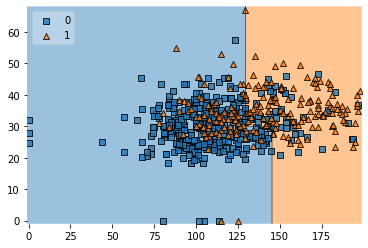

In [262]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

tree_front = DecisionTreeClassifier(random_state=42, max_depth=3)
tree_front.fit(X_front, y_train)

# Plotting decision regions
plot_decision_regions(X_front, y_train.to_numpy(), clf=tree_front, legend=2)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
#plt.title('SVM on Iris')
plt.show()